<a href="https://colab.research.google.com/github/johnznjmz/prophet/blob/master/Prophet_stock_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy import stats
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [25]:
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&interval={}&apikey={}&datatype=csv&outputsize=full'
#base_url ='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval={}&apikey={}&datatype=csv&outputsize=full'
url = base_url.format("NG", "1min", "KVCLRXKWY5KGVFH9")
response = requests.get(url)
data = pd.read_csv(url)
data = data.sort_values(by=['timestamp']).reset_index(drop=True)
# Create a copy to avoid the SettingWarning .loc issue 
data_df = data.copy()
# Change to datetime datatype.
data_df.loc[:, 'timestamp'] = pd.to_datetime(data.loc[:,'timestamp'])
# Drop the columns
ph_df = data_df.drop(['open', 'high', 'low', 'volume'], axis=1)
ph_df.rename(columns={'close': 'y', 'timestamp': 'ds'}, inplace=True)
#check parameters later
m = Prophet()
m.fit(ph_df)
# Create Future dates
future_prices = m.make_future_dataframe(periods=61)
# Predict Prices
forecast = m.predict(future_prices)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


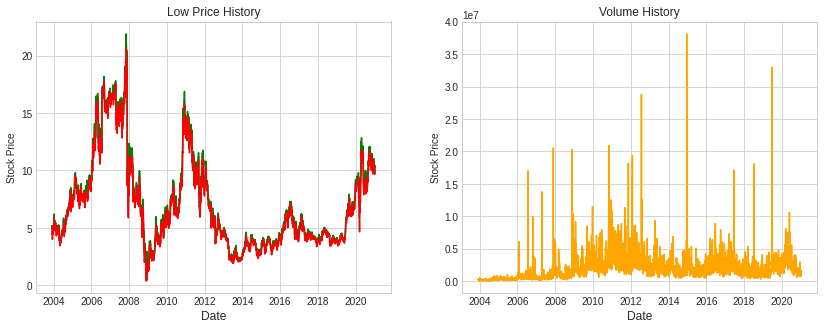

In [32]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(data_df["timestamp"], data_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close Price History")

# Second Subplot
ax1.plot(data_df["timestamp"], data_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("High Price History")

# Third Subplot
ax1.plot(data_df["timestamp"], data_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

# Fourth Subplot
ax2.plot(data_df["timestamp"], data_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Volume History")
plt.show()

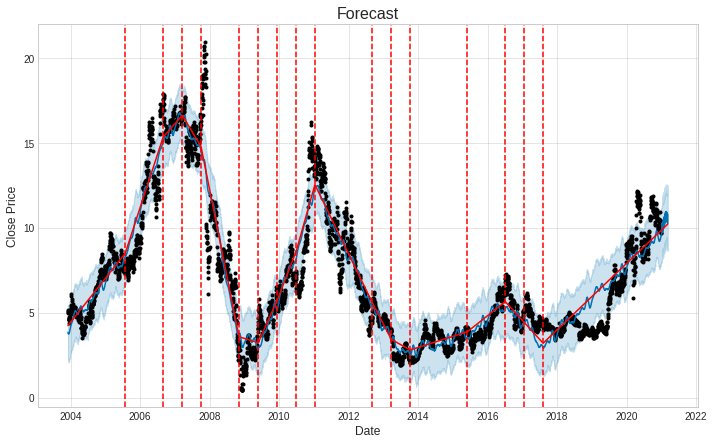

In [34]:
# Dates
'''starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)'''

# Learn more Prophet tomorrow and plot the forecast.
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
'''ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), 
            xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')'''

plt.show()

In [ ]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

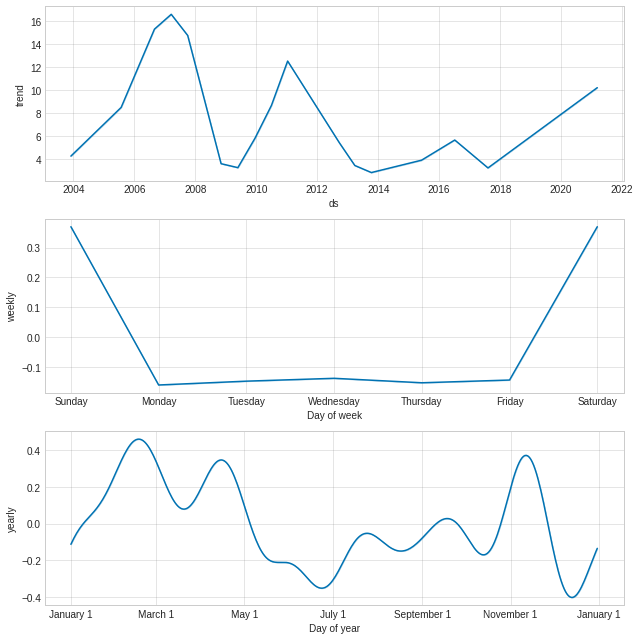

In [35]:
Trend_fig = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


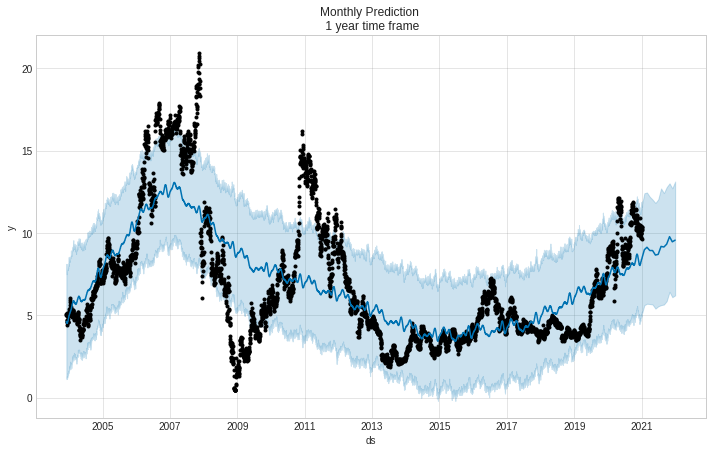

In [36]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

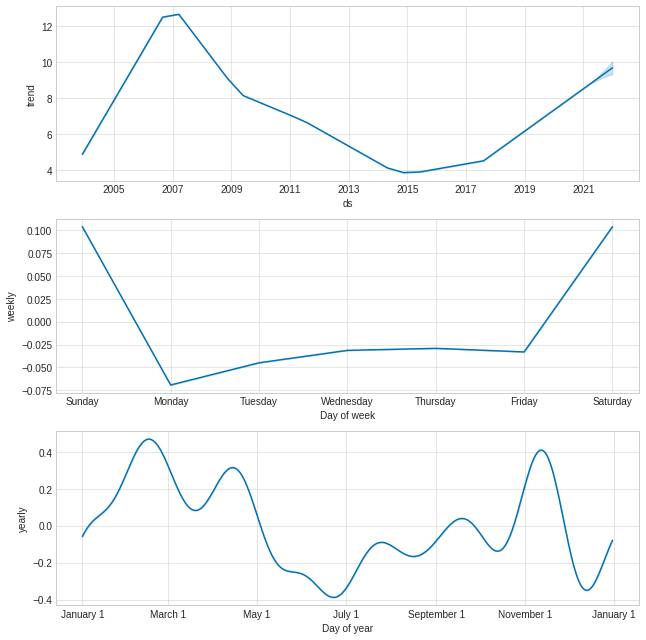

In [37]:
Fcst_12_M = m.plot_components(fcst)
plt.show()


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 27 forecasts with cutoffs between 2007-03-14 00:00:00 and 2020-01-05 00:00:00


In [ ]:
cutoffs = df_cv.cutoff 

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,119.526344,10.932810,8.606020,0.172981,0.128870,0.549780
1,37 days,122.093510,11.049593,8.705294,0.175416,0.132920,0.545022
2,38 days,123.772304,11.125300,8.768573,0.176767,0.136234,0.544425
3,39 days,125.135575,11.186401,8.814358,0.177909,0.137569,0.544579
4,40 days,127.288467,11.282219,8.903819,0.179749,0.139611,0.543115


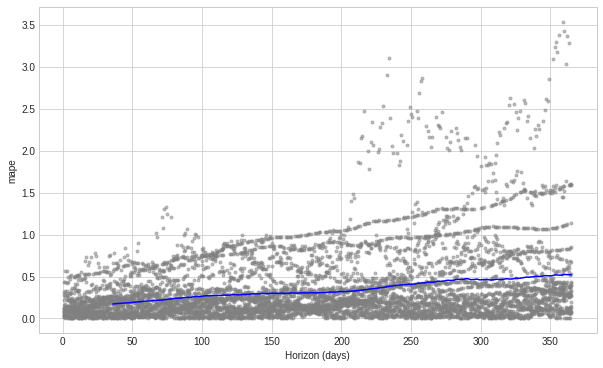

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [38]:
#Quiskit_test:TS

In [ ]:
%matplotlib inline
from qiskit.finance import QiskitFinanceError
from qiskit.finance.data_providers import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
data = RandomDataProvider(tickers=["TICKER1", "TICKER2"],
                 start = datetime.datetime(2016, 1, 1),
                 end = datetime.datetime(2016, 1, 30),
                 seed = 1)
data.run()

In [ ]:
means = data.get_mean_vector()
print("Means:")
print(means)

rho = data.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
plt.imshow(rho)
plt.show()

cov = data.get_covariance_matrix()
print("A covariance matrix:")
print(cov)
plt.imshow(cov)
plt.show()

In [ ]:
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(data._tickers):
    print(s)
    print(data._data[cnt]

In [ ]:
data = RandomDataProvider(tickers=["CompanyA", "CompanyB", "CompanyC"],
                 start = datetime.datetime(2015, 1, 1),
                 end = datetime.datetime(2016, 1, 30),
                 seed = 1)
data.run()
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
stocks = ["GOOG", "AAPL"]

token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        wiki = WikipediaDataProvider(
                         token = token,
                         tickers = stocks,
                         start = datetime.datetime(2016,1,1),
                         end = datetime.datetime(2016,1,30))
        wiki.run()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

In [ ]:
if token != "REPLACE-ME":
    if wiki._data:
        if wiki._n <= 1: 
            print("Not enough wiki data to plot covariance or time-series similarity. Please use at least two tickers.")
        else:
            rho = wiki.get_similarity_matrix()
            print("A time-series similarity measure:")
            print(rho)
            plt.imshow(rho)
            plt.show()

            cov = wiki.get_covariance_matrix()
            print("A covariance matrix:")
            print(cov)
            plt.imshow(cov)
            plt.show()
    else:
        print('No wiki data loaded.')

In [ ]:
if token != "REPLACE-ME":
    if wiki._data:
        print("The underlying evolution of stock prices:")
        for (cnt, s) in enumerate(stocks):
            plt.plot(wiki._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()

        for (cnt, s) in enumerate(stocks):
            print(s)
            print(wiki._data[cnt])
    else:
        print('No wiki data loaded.')

In [ ]:
token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        nasdaq = DataOnDemandProvider(token = token,
                     tickers = ["GOOG", "AAPL"],
                     start = datetime.datetime(2016,1,1),
                     end = datetime.datetime(2016,1,2))
        nasdaq.run()
        for (cnt, s) in enumerate(nasdaq._tickers):
            plt.plot(nasdaq._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

In [ ]:
token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        lse = ExchangeDataProvider(token = token,
                     tickers = ["AEO", "ABBY", "ADIG", "ABF", 
                                "AEP", "AAL", "AGK", "AFN", "AAS", "AEFS"],
                     stockmarket = StockMarket.LONDON,
                     start=datetime.datetime(2018, 1, 1),
                     end=datetime.datetime(2018, 12, 31))
        lse.run()
        for (cnt, s) in enumerate(lse._tickers):
            plt.plot(lse._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()
    except QiskitFinanceError as ex: 
        print(ex)
        print("Error retrieving data.")

In [ ]:
try:
    data = YahooDataProvider(
                 tickers = ["AEO", "ABBY", "AEP", "AAL", "AFN"],
                 start=datetime.datetime(2018, 1, 1),
                 end=datetime.datetime(2018, 12, 31))
    data.run()
    for (cnt, s) in enumerate(data._tickers):
        plt.plot(data._data[cnt], label=s)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
except QiskitFinanceError as ex: 
    data = None
    print(ex)